In [18]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-anna-nikitina/shared/homeworks/python_ds_miniprojects/4/data/2020-12-03/')

['Alexey_Smirnov',
 'Anton_Petrov',
 'Vasiliy_Petrov',
 'Kirill_Petrov',
 'Petr_Fedorov',
 'Vasiliy_Ivanov']

In [20]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-anna-nikitina/shared/homeworks/python_ds_miniprojects/4/data/2020-12-03/Alexey_Smirnov/data.csv'
data = '2020-12-03'
name = 'Alexey_Smirnov'

In [21]:
df = pd.read_csv(path_to_file)

In [22]:
list_name = [name]*df.shape[0]

In [23]:
df['name'] = list_name
df.columns

Index(['Unnamed: 0', 'product_id', 'quantity', 'name'], dtype='object')

In [26]:
df = pd.DataFrame(columns=['product_id', 'quantity', 'name', 'data_purchases'])
path_to_1_order = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-anna-nikitina/shared/homeworks/python_ds_miniprojects/4/data/'

for data in os.listdir(path_to_1_order):
    path_to_order = "".join([path_to_1_order, data, '/']) 
    for name in os.listdir(path_to_order):
        path_to_file = "".join([path_to_order, name, '/', 'data.csv']) 
        df_new = pd.read_csv(path_to_file, index_col=False)
        df_new['name'] = [name]*df_new.shape[0]
        df_new['data_purchases'] = [data]*df_new.shape[0]
        df = df.append(df_new)
df = df.reset_index(drop=True)
df = df.drop('Unnamed: 0', axis=1)
df

,product_id,quantity,name,data_purchases
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


In [29]:
df = df.astype({'product_id':'int', 'quantity':'int', 'name':'string'})
df['data_purchases'] = pd.to_datetime(df.data_purchases)
df['day'] = df.data_purchases.dt.date
df.head()


,product_id,quantity,name,data_purchases,day
0,27,4,Petr_Ivanov,2020-12-05,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05,2020-12-05


In [10]:
df_max = df.groupby('name', as_index=False).agg({'quantity':'sum'}).sort_values(by='quantity')
max_value = df_max.quantity.max()
df_max.name[df_max.quantity == 52]

3     Alexey_Smirnov
13      Petr_Smirnov
Name: name, dtype: object

In [11]:
df_product = df.groupby('product_id', as_index=False).agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False).head(10)
df_product

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


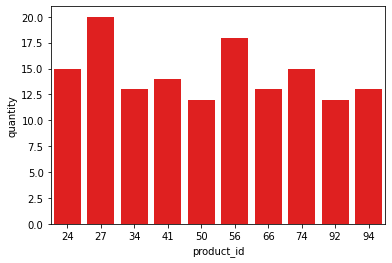

In [12]:

ax = sns.barplot(data=df_product, x='product_id', y='quantity', color='red')


In [30]:
df_to_data = df.groupby('day', as_index=False).agg({'quantity':'sum'}).sort_values(by='day')

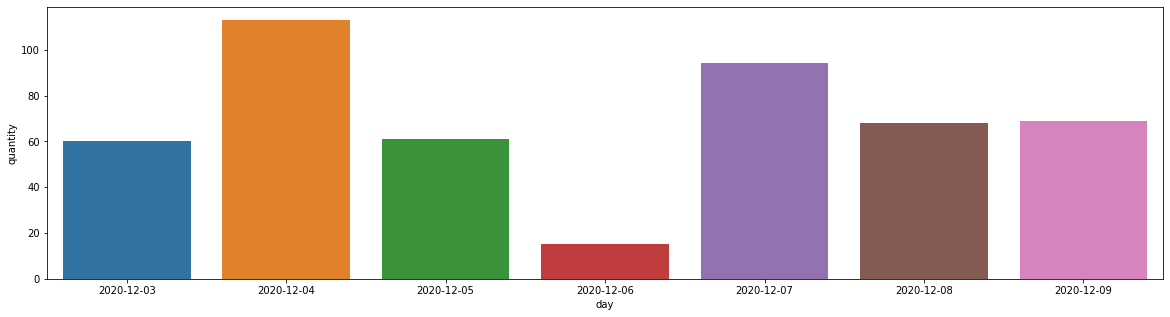

In [31]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df_to_data, x='day', y='quantity')

In [15]:
df.tail()

,product_id,quantity,name,data,Unnamed: 0
156,18,4,Petr_Fedorov,2020-12-07,0.0
157,94,4,Petr_Fedorov,2020-12-07,1.0
158,95,2,Vasiliy_Ivanov,2020-12-07,0.0
159,83,3,Vasiliy_Ivanov,2020-12-07,1.0
160,64,1,Vasiliy_Ivanov,2020-12-07,2.0


In [16]:
df.drop_duplicates(subset=['product_id', 'data', 'name']).groupby(['product_id', 'name'], as_index=False).agg({'quantity':'count'}).sort_values(by='quantity')

,product_id,name,quantity
0,0,Vasiliy_Ivanov,1
100,64,Alexey_Smirnov,1
101,64,Petr_Petrov,1
102,64,Rostislav_Petrov,1
103,64,Vasiliy_Ivanov,1
...,...,...,...
55,32,Rostislav_Petrov,1
49,27,Rostislav_Petrov,1
157,99,Rostislav_Smirnov,1
150,94,Petr_Fedorov,2
